In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

In [11]:

n = 20002
Days_list = (-3,-2,-1,0,1,2)
path = "./results/"+str(n)+"allpc_" #"./results/pc_"
df = pd.DataFrame()


for file in glob.glob(path+"*heap.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]
df.head()

,DAYS,actual_gen_times_25,actual_gen_times_75,actual_gen_times_mean,avg_daily_growth_rate,cases,die_out,pc,secondary_cases_25,secondary_cases_75,secondary_cases_mean,sim
0,2.0,0.945468,3.501802,2.446818,1.262010,6457,False,$1.0$,0.0,0.0,1.431387,0
1,2.0,0.945468,3.501802,2.446818,1.000000,6,True,$1.0$,0.0,0.0,1.431387,1
2,2.0,0.945468,3.501802,2.446818,1.000000,6,True,$1.0$,0.0,0.0,1.431387,2
3,2.0,0.945468,3.501802,2.446818,1.005152,7,True,$1.0$,0.0,0.0,1.431387,3
4,2.0,0.945468,3.501802,2.446818,1.005152,7,True,$1.0$,0.0,0.0,1.431387,4


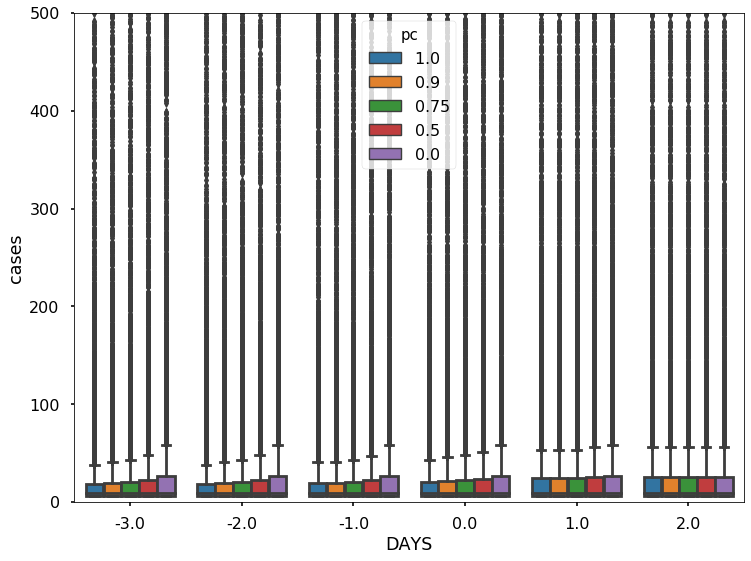

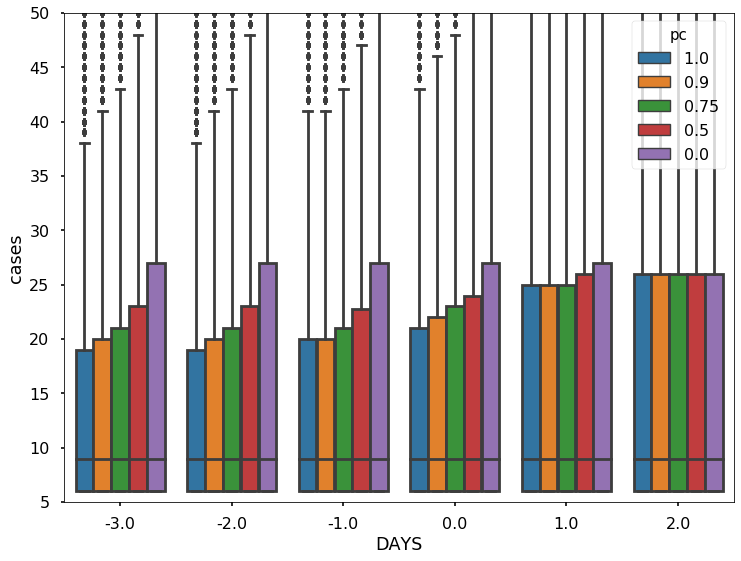

In [12]:


#zoomed in

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax,
    )
ax.set_ylim((0,500))
plt.show()

#zoomed out

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((5,50))
plt.show()

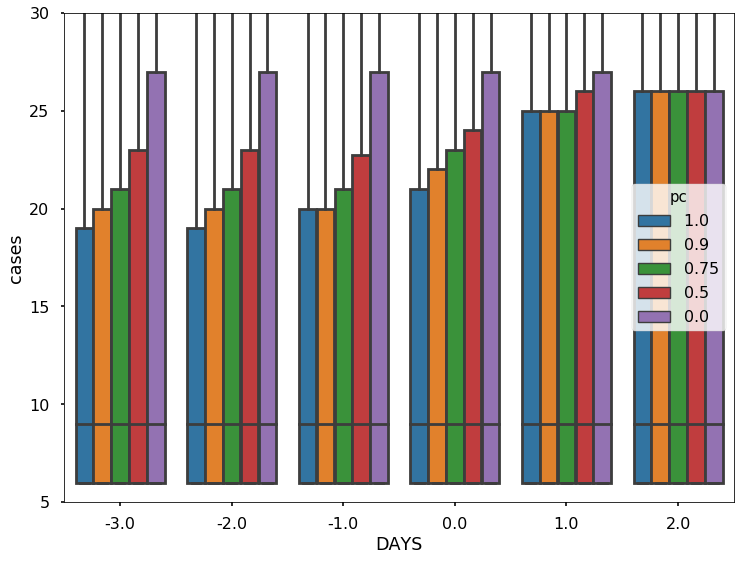

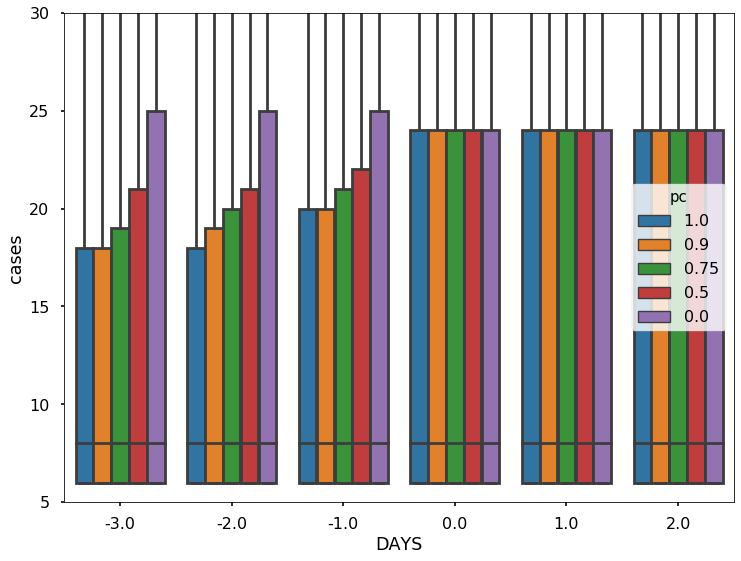

In [15]:
n = 20003
Days_list = (-3,-2,-1,0,1,2)
path = "./results/"+str(n)+"allpc_" #"./results/pc_"
df2 = pd.DataFrame()


for file in glob.glob(path+"*heap_gens1.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df2 = df2.append(temp)
df2.pc = ["$%s$" % x for x in df2.pc]

#zoomed out

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((5,30))#zoomed out

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df2,
    ax=ax
    )
ax.set_ylim((5,30))

plt.show()


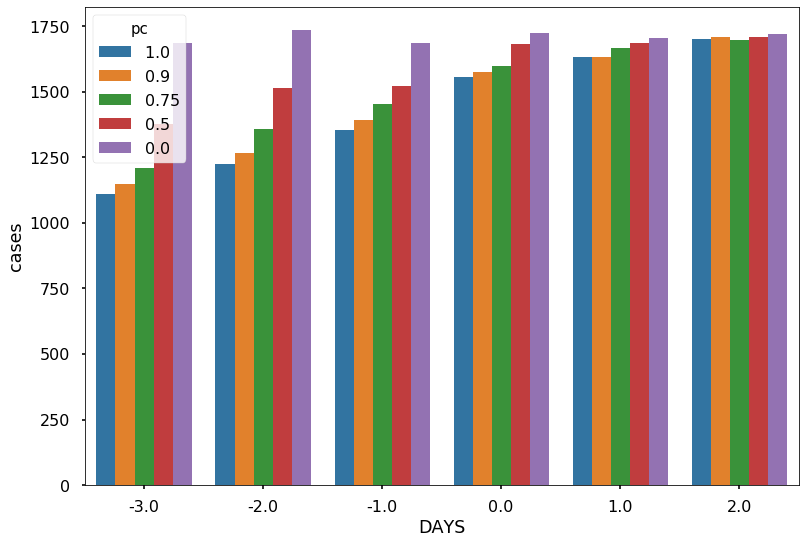

In [22]:
sns.barplot(
    x='DAYS',
    y='cases',
    hue='pc',
    hue_order=["$0.0$","$0.5$","$0.75$","$0.9$",'$1.0$'][::-1],
    data=df2.groupby(['DAYS','pc']).cases.mean().reset_index())

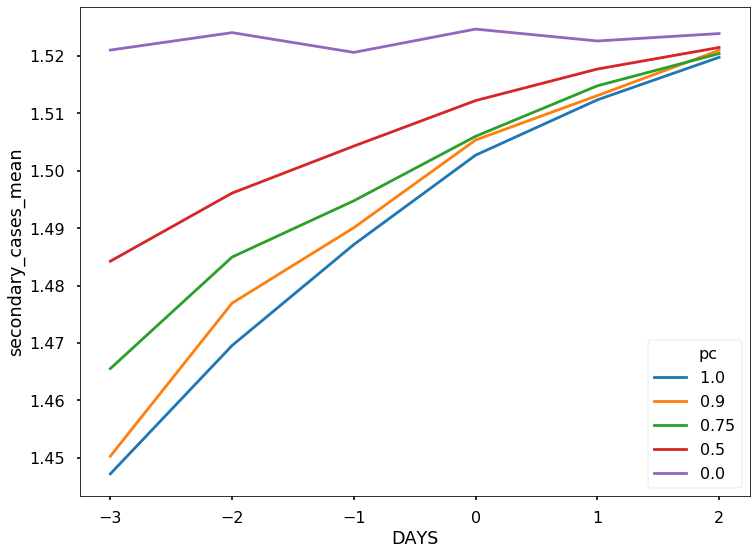

In [7]:
fig,ax = plt.subplots(figsize=(12,9))

lines =sns.lineplot(
    x="DAYS",
    y="secondary_cases_mean",
    hue="pc",
    data =df2,
    ax=ax
    )

#ax.set_yticks([1,1.6],minor=True)
#ax.yaxis.grid(which='minor', color='grey')
#for pc in ["$0.5$","$0.75$","$0.9$",'$1.0$']:
#    ax.fill_between(Days_list, 
#                    df.loc[df.pc==pc].groupby("DAYS").secondary_cases_25.max(),
#                    df.loc[df.pc==pc].groupby("DAYS").secondary_cases_75.max(),
#                   alpha=0.2
#                   )

#ax.set_ylim((0,0.2))
plt.legend()

plt.show()

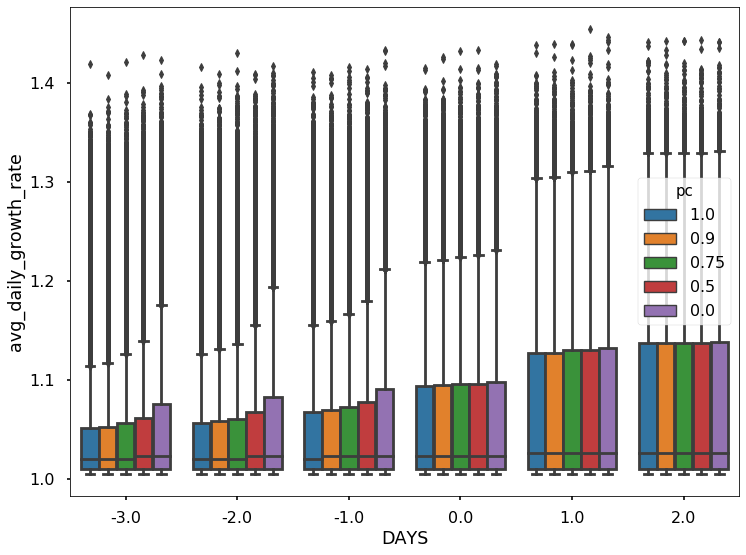

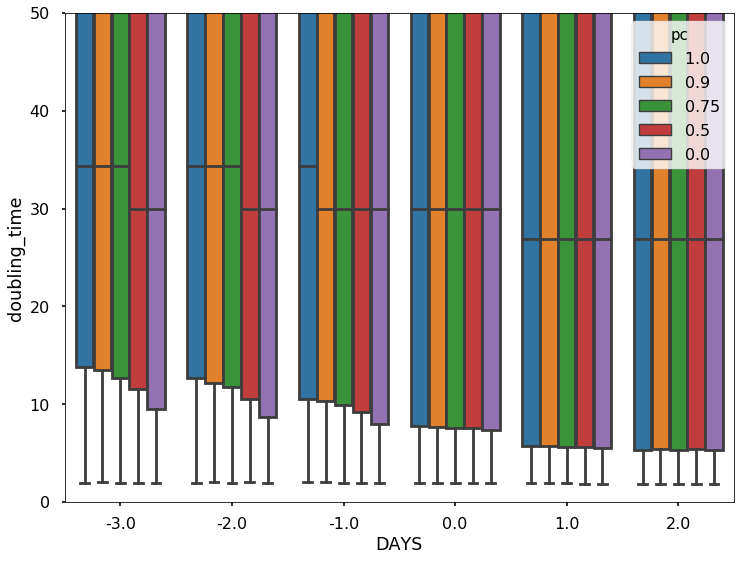

In [8]:
## growth rate and doubling time
df=df2
df.loc[df.avg_daily_growth_rate==1,'avg_daily_growth_rate'] = np.NaN
df['doubling_time'] = np.log(2)/np.log(df.avg_daily_growth_rate)

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="avg_daily_growth_rate",
    hue="pc",
    data =df,
    ax=ax
    )

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="doubling_time",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,50))
plt.show()



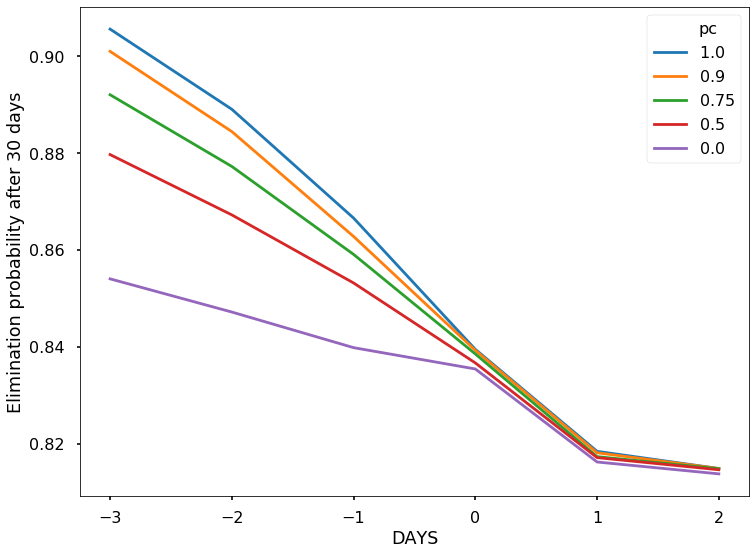

In [9]:
#Elimination out probabiltiy
mean_col = df.groupby(['DAYS','pc']).die_out.mean()
df = df.set_index(['DAYS','pc'])
df['die_out_mean'] = mean_col
df = df.reset_index()

fig,ax = plt.subplots(figsize=(12,9))

sns.lineplot(
    x = "DAYS",
    y = "die_out_mean",
    hue="pc",
    data = df
)
ax.set_ylabel("Elimination probability after 30 days")
plt.show()

In [36]:
def toy(child,parent_detected, DAYS=-2, parent_sot = 5, parent_at = 8):
    from random import random
    if parent_detected:
        print("parent detected")
        if child < parent_sot + DAYS:
            print("Too early, not traced")
        elif child < parent_at:
            if random()< 0.5:
                print("Traced")
            else:
                print("Not traced")
    else:
        print("parent undetected")


In [47]:
toy(3, False)

parent undetected


In [18]:
def new_sampler(items, weights=None):
    from numpy.random import random
    r = random()
    if weights is None:
        #Create uniform weights
        #weights = [1/len(items)] * len(items)
        index = int(r*len(items))
        return items[index]
    else:
        for i,item in enumerate(items):
            r-= weights[i]
            if r <0:
                return item
            
def old_sampler(items, weights=None):
    from numpy.random import random
    r = random()
    if weights is None:
        #Create uniform weights
        weights = [1/len(items)] * len(items)


    for i,item in enumerate(items):
        r-= weights[i]
        if r <0:
            return item

x = np.random.random(size=1000)

In [21]:
import timeit

timeit.timeit(stmt="new_sampler(x)", 
              setup="from __main__ import new_sampler,old_sampler,x",
             number = 1000,
             )


0.0018868010010919534

In [22]:
timeit.timeit(stmt="old_sampler(x)", 
              setup="from __main__ import new_sampler,old_sampler,x",
             number=1000,
             )

0.09406599900103174

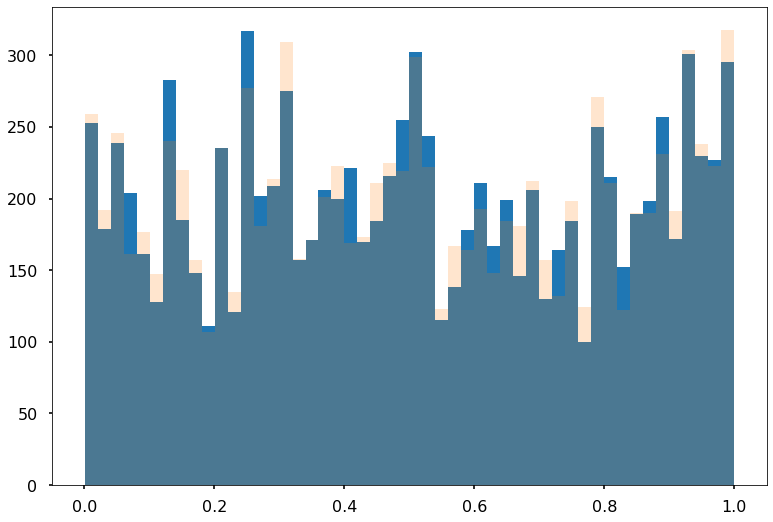

In [28]:
n = [new_sampler(x) for n in range(10000) ]
o = [old_sampler(x) for n in range(10000)]

fig,ax = plt.subplots()

ax.hist(n, bins=50)
ax.hist(o, alpha=0.2, bins=50)

plt.show()


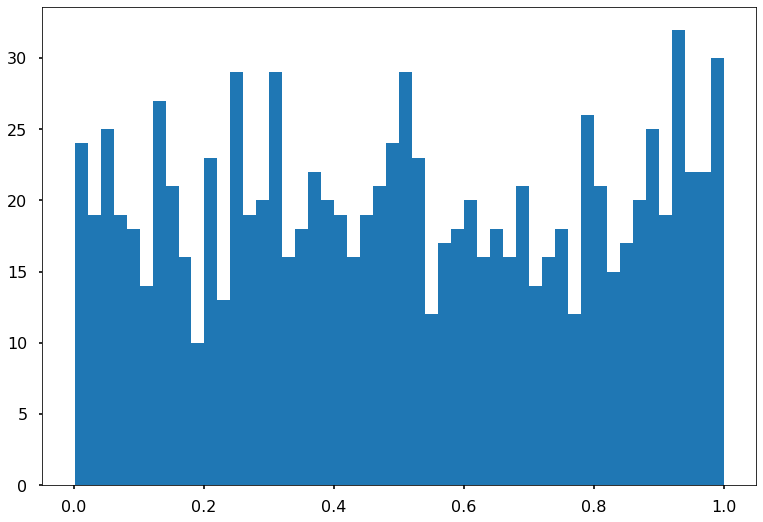

In [29]:
plt.hist(x,bins=50)
plt.show()